<a href="https://colab.research.google.com/github/Memo28/100DayofML/blob/master/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


In [54]:
n = 100
h = n//2
dimen = 2
# Generate random data
data = np.random.rand(n, dimen)*3
data

array([[0.20024984, 1.62323929],
       [1.38476435, 1.93543088],
       [2.62285432, 2.47854767],
       [1.84668563, 0.69992484],
       [2.00714704, 0.40638274],
       [1.15712188, 1.51811008],
       [1.41605342, 2.91090362],
       [2.01200115, 2.61738518],
       [2.41559577, 1.94477077],
       [0.6300857 , 2.7980467 ],
       [0.74660527, 2.84939332],
       [1.00059779, 2.3888019 ],
       [1.27269566, 0.25487704],
       [0.09582116, 1.51793148],
       [2.52297238, 1.12909891],
       [1.81745126, 0.2798601 ],
       [2.6308384 , 0.85842314],
       [0.90848858, 1.13375181],
       [0.22976675, 2.20683158],
       [0.86073361, 0.40578243],
       [1.08262455, 0.17285133],
       [1.4690075 , 1.25865084],
       [1.28961241, 1.56006584],
       [1.49853543, 0.82749113],
       [1.60003995, 0.46118732],
       [0.95076708, 2.4707069 ],
       [0.12937827, 0.37781954],
       [0.15259354, 1.74523128],
       [2.01603432, 0.93971069],
       [2.40365318, 1.05741642],
       [0.

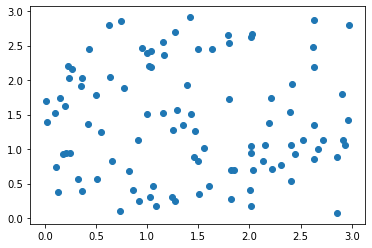

In [55]:
# Mapping the data
plt.scatter(data[:,0], data[:,1])

In [0]:
# Creating an arbitrarian point
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))

In [0]:
# Creating an arbitrarian point
data[h:, :] = data[h:, :] + 3*np.ones((h, dimen))

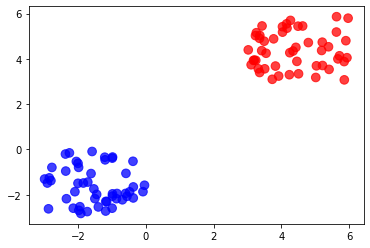

In [58]:
# Maping the data and given a color
colors = ['blue', 'red']
color = np.array([colors[0]]* h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha= 0.75)

In [59]:
# Creating the target
target = np.array([0]* h + [1]*h).reshape(n, 1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.0240, grad_fn=<BinaryCrossEntropyBackward>)

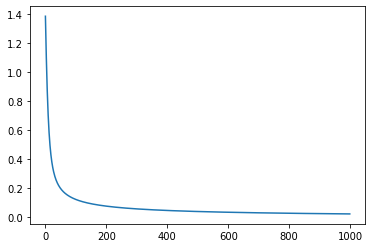

In [60]:
# Creating a linear regresion an applying a sigmoid function to get a value between [0,1] for the clasification
model = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
)

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []
iterations = 1000
for i in range(iterations):
  # Forward past
  result = model(x)
  loss = loss_function(result, y)
  losses.append(loss.data)

  # Back propagation
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [61]:
# Checking the model with values
blue = torch.Tensor([[-1, -2]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[5, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


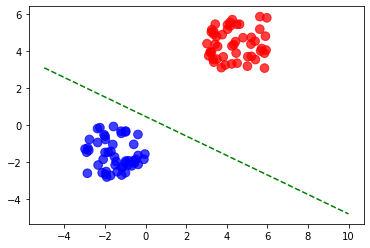

In [63]:
# Getting the weights
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# Plotting separating the data
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.75)

x_axis = np.linspace(-5, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')